Enter the word: राम
Total Occurences 5544
Categories      Total Count
------------  -------------
art                     653
corona                   83
economy                 414
foreign                 325
health                  572
interview               854
opinion                1043
politics                430
society                 555
sports                  192
technology              177
world                   246


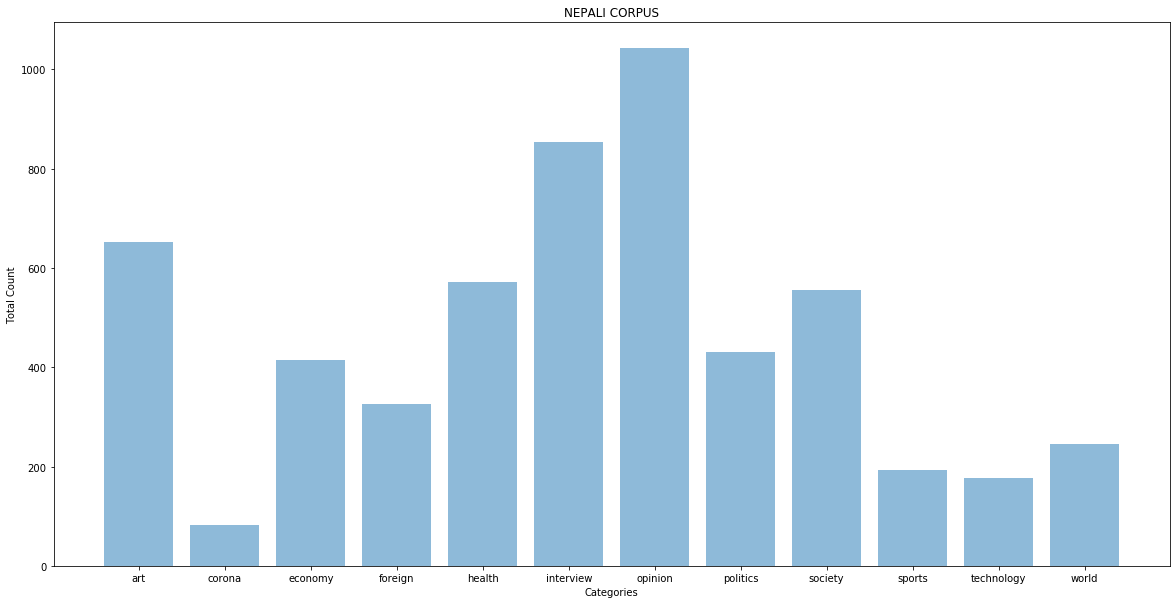

In [3]:
import os
import nltk
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

from nltk.tokenize import word_tokenize
files = []
inp=input("Enter the word: ")
occurences=0
path=r"E:\VIT\Sem 6\NLP\JComp\Corpus"
all_files = os.listdir(path)
new_list=[]
categories_found=[]
categories_count=[]
xyz={}
uvw=[]
headers=['Categories','Total Count']

for fle in all_files:
    outer_path=os.path.join(path, fle)
    for folders in (os.listdir(outer_path),"r"):
        for fol in folders:
            if(fol != 'r'):
                inner_path=os.path.join(outer_path, fol)
                for docs in (os.listdir(inner_path),"r"):
                    for fl in docs:
                        if(fl != 'r'):
                            categories_path=os.path.join(inner_path, fl)
                            with open(categories_path,"r",encoding='utf-8') as f:
                                text = f.read()
                                text=text.replace("\n","")
                                text=text.replace("?","।")
                                new_list.append(text)
                                sentences=text.split(u"।")
                                for i in range(0,len(sentences)):
                                    if sentences[i].find(inp)>=0:
                                        cat=os.path.basename(os.path.dirname(categories_path))
                                        #print("Category->",cat)
                                        #print(sentences[i])
                                        occurences=occurences+1
                                        found=0
                                        for i in range(0,len(categories_found)): 
                                            if categories_found[i].find(cat)>=0:  #if found
                                                position=i
                                                found=1
                                        if(found==1):
                                            categories_count[position]=categories_count[position]+1
                                            #print([categories_found[position]])
                                            #print(categories_count[position])
                                            if( categories_found[position] in xyz.keys()):
                                                temp={categories_found[position]:categories_count[position]}
                                                xyz.update(temp)
                                                #uvw.append([categories_found[position],categories_count[position]])
                                            else:
                                                xyz[categories_found[position]]=categories_count[position]
                                        else:
                                            categories_found.append(cat)
                                            categories_count.append(1)
                                            #xyz[cat]=xyz[cat]+1
print("Total Occurences",occurences)
for key in xyz:
    uvw.append([key,xyz[key]])
#for i in range(len(categories_found)):
    #print(categories_found[i]+" - > "+categories_count[i])
 #   print("%s %s" % (categories_found[i], categories_count[i]))
print(tabulate(uvw,headers=headers))
y_pos = np.arange(len(categories_found))
plt.figure(figsize=(20, 10))
plt.bar(y_pos, categories_count, align='center', alpha=0.5, width=0.8)
plt.xticks(y_pos, categories_found)
plt.xlabel('Categories')
plt.ylabel('Total Count')
plt.title('NEPALI CORPUS')
plt.savefig('my_plot.png')
plt.show()
